# Time Series  Analysis on Apple Stock Data 

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [24]:
df=yf.download('AAPL', start='2024-01-01')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
...,...,...,...,...,...
2025-06-20,201.000000,201.699997,196.860001,198.240005,96813500
2025-06-23,201.500000,202.300003,198.960007,201.630005,55814300


In [25]:
df4=df.copy()

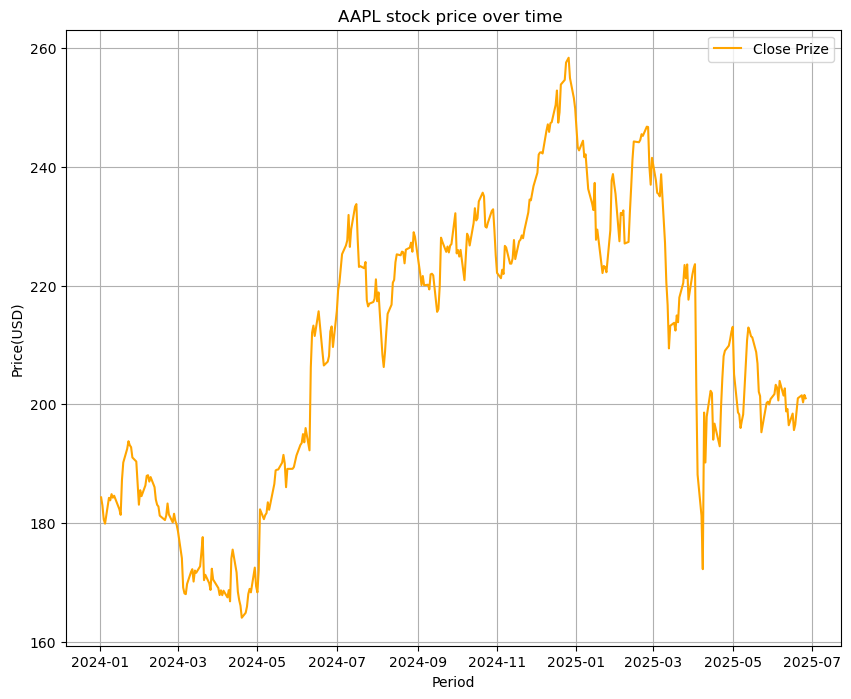

In [26]:
plt.figure(figsize=(10,8))
plt.plot(df.index,df['Close'],label='Close Prize',color='orange')
plt.title('AAPL stock price over time ')
plt.xlabel('Period')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(df['Close'],model='additive',period=30)

In [7]:

trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

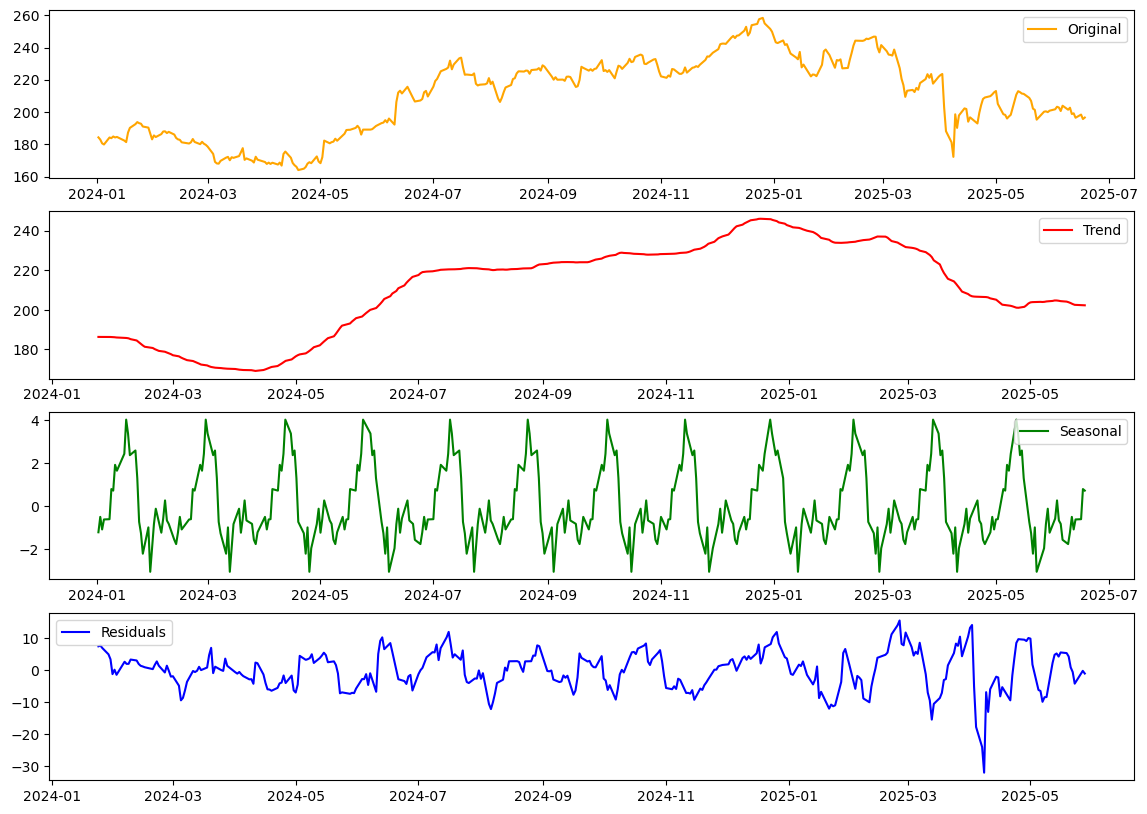

In [8]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['Close'],label='Original',color='Orange')
plt.legend()
plt.subplot(412)
plt.plot(trend_additive,label='Trend',color='red')
plt.legend()
plt.subplot(413)
plt.plot(seasonal_additive,label='Seasonal',color='green')
plt.legend()
plt.subplot(414)
plt.plot(residual_additive,label='Residuals',color='blue')
plt.legend()
plt.show()


# Stationarity test

In [9]:
from statsmodels.tsa.stattools import adfuller
def fullertest(x):
    result = adfuller(x.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"  {key}: {value}")


In [10]:
print("test values for 'Close'")
fullertest(df['Close'])
print("test values for 'Open'")
fullertest(df['Open'])
print("test values for 'High'")
fullertest(df['High'])
print("test values for 'Low'")
fullertest(df['Low'])

test values for 'Close'
ADF Statistic: -1.7748134416751495
p-value: 0.3930358534700986
Critical Values:
  1%: -3.448493650810824
  5%: -2.8695352280356556
  10%: -2.5710293341377715
test values for 'Open'
ADF Statistic: -1.7339565170459563
p-value: 0.41370740397851363
Critical Values:
  1%: -3.448493650810824
  5%: -2.8695352280356556
  10%: -2.5710293341377715
test values for 'High'
ADF Statistic: -1.7116957569362967
p-value: 0.42509676901823895
Critical Values:
  1%: -3.4483935212959844
  5%: -2.8694912343676497
  10%: -2.571005879151811
test values for 'Low'
ADF Statistic: -1.9507928882900196
p-value: 0.3085563828588681
Critical Values:
  1%: -3.4483935212959844
  5%: -2.8694912343676497
  10%: -2.571005879151811


In [11]:
price_diff=df['Close'].diff()
fullertest(price_diff.dropna())

ADF Statistic: -11.278650627847862
p-value: 1.4748732682532042e-20
Critical Values:
  1%: -3.448493650810824
  5%: -2.8695352280356556
  10%: -2.5710293341377715


In [12]:
2.1866115906309805e-20<0.05

True

# Moving Average Model

In [13]:
prices = df['Close']
window = 10
prices_cl=prices.rolling(window=window).mean()
prices_detrended=prices - prices_cl
prices_detrended=prices_detrended.dropna()

In [14]:
fullertest(prices_detrended)


ADF Statistic: -7.372332074247216
p-value: 8.904500869106991e-11
Critical Values:
  1%: -3.448905534655263
  5%: -2.8697161816205705
  10%: -2.5711258103550882


In [15]:
1.1347632236560334e-10<0.05

True

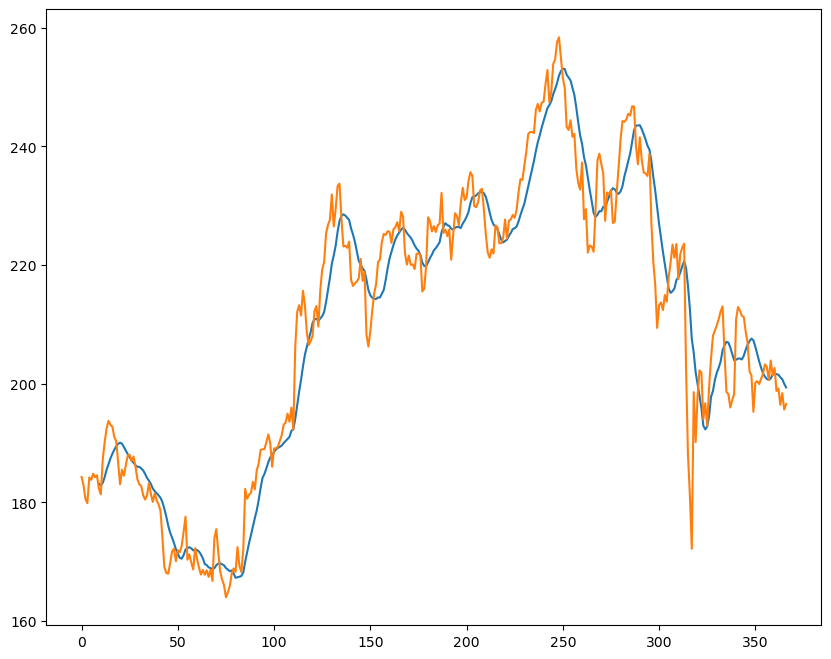

In [16]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(prices)),prices_cl)
plt.plot(np.arange(len(prices)),prices)
plt.show()

# Data Splitting

In [17]:
apple_price=df['Close'].diff().dropna()
train_data,test_data=apple_price[:-30],apple_price[-30:]

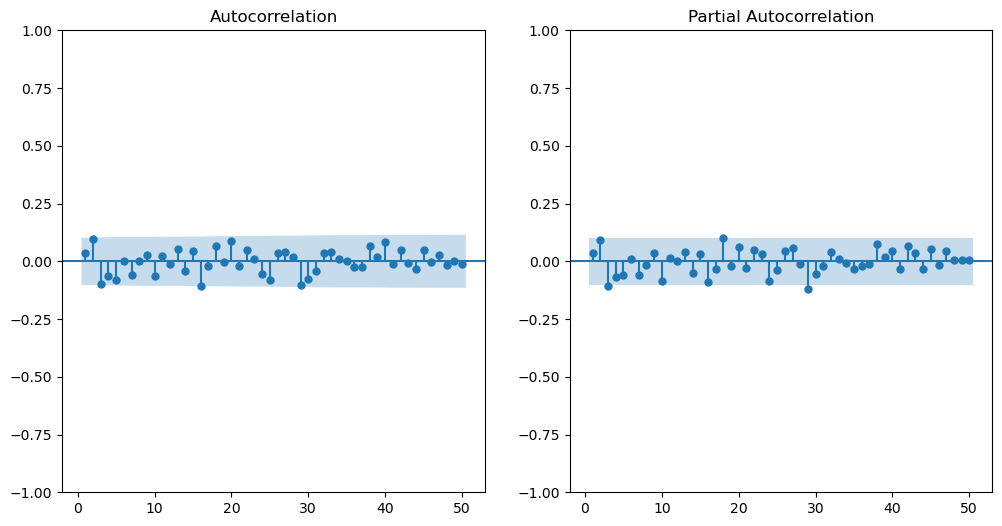

In [18]:
# Plotting ACF and PACF graph for 
# P(No. of Past Data Points taken into Consideration) 
# Q(No. of Past Error States) values in ARIMA MODEL

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(apple_price, lags=50, zero=False, ax=ax1)
plot_pacf(apple_price, lags=50, zero=False, ax=ax2)
plt.show()

# ARIMA Model

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model = ARIMA(train_data, order=(7,1,7))
model_fit=model.fit()

prediction = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)

from math import sqrt
rmse = sqrt(mean_squared_error(test_data, prediction))
rmse



3.480224714280368

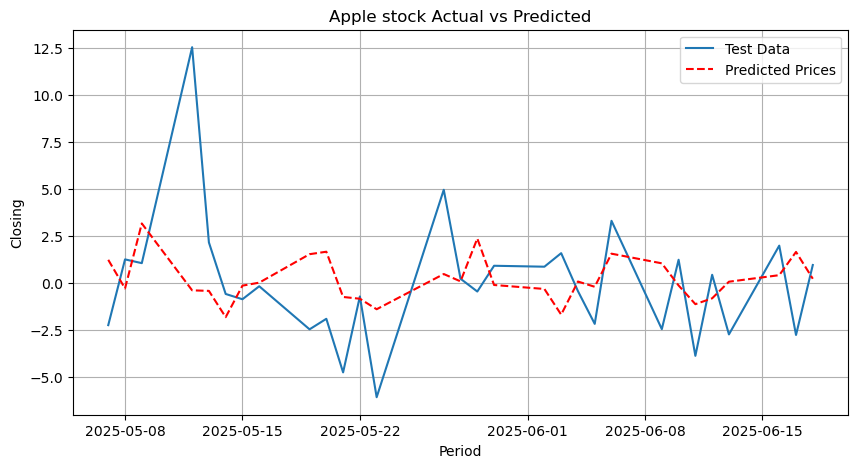

In [20]:
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, prediction, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple stock Actual vs Predicted')
plt.xlabel('Period')
plt.ylabel('Closing')
plt.legend()
plt.grid(True)
plt.show()

# SARIMA MODEL

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train_data, order=(5,1,4), seasonal_order=(2,1,2,42))
model_fit=model.fit()

predictions_sarima=model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

rmse = sqrt(mean_squared_error(test_data, predictions_sarima))
rmse

4.440723861065416

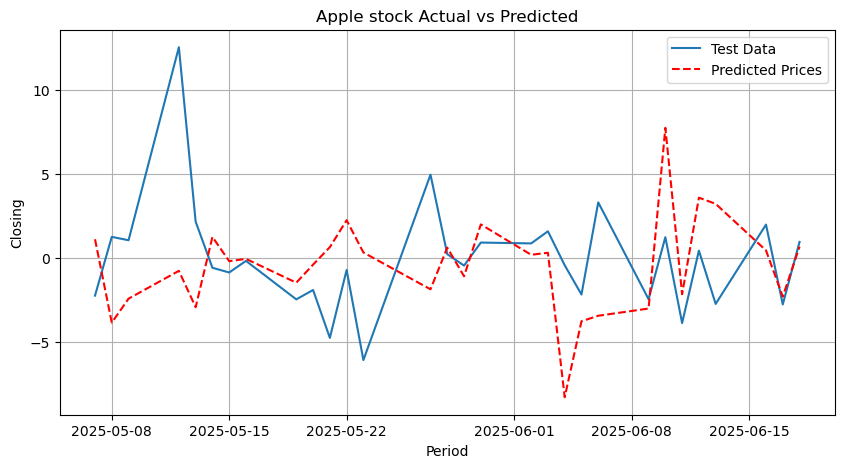

In [22]:
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions_sarima, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple stock Actual vs Predicted')
plt.xlabel('Period')
plt.ylabel('Closing')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290436,187.070083,182.553158,185.789453,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
...,...,...,...,...,...
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300


# PROPHET MODEL

In [26]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt

df = df.reset_index()

# Create differenced series
stock = df[['Date', 'Close']].copy()
stock['y'] = stock['Close'].diff()
stock = stock.dropna()
stock = stock.rename(columns={'Date': 'ds'})

train_data = stock[:-30]
test_data = stock[-30:]
# Prophet model
model = Prophet()
model.fit(train_data)

# Predict
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Evaluation
pred = forecast[['ds', 'yhat']].iloc[-30:]['yhat'].values
actual = test_data['y'].values
rmse = sqrt(mean_squared_error(actual, pred))
print("RMSE:", rmse)


15:06:40 - cmdstanpy - INFO - Chain [1] start processing
15:06:42 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 3.4333797666479273


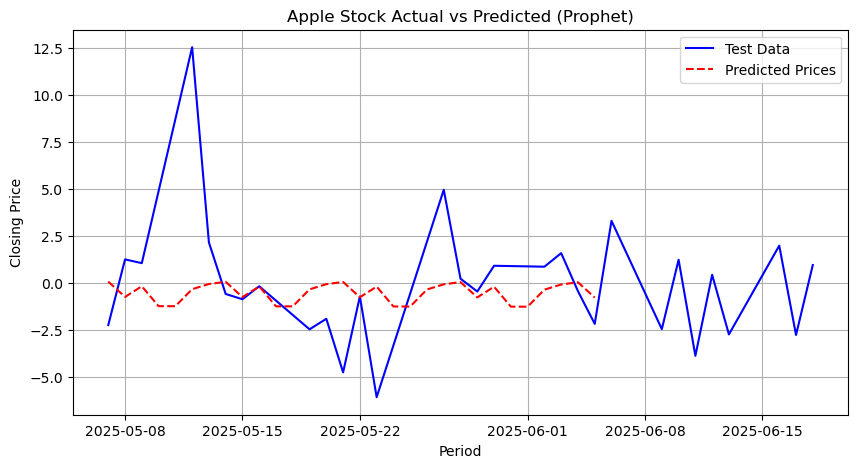

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test_data['ds'], test_data['y'], label='Test Data',color='blue')
plt.plot(forecast['ds'].iloc[-30:], forecast['yhat'].iloc[-30:], color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Actual vs Predicted (Prophet)')
plt.xlabel('Period')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
data=df.copy()

# LSTM MODEL

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
df=yf.download('AAPL', start='2024-01-01')

# Prepare data
data = df[['Close']]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# Create sequences
X, y = [], []
for i in range(60, len(scaled)):
    X.append(scaled[i-60:i])
    y.append(scaled[i])
X, y = np.array(X), np.array(y)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mse')
model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


C:\Users\ACER\AppData\Local\Temp\ipykernel_1652\2920900370.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download('AAPL', start='2024-01-01')
[*********************100%***********************]  1 of 1 completed


2/2 [==============================] - 1s 15ms/step


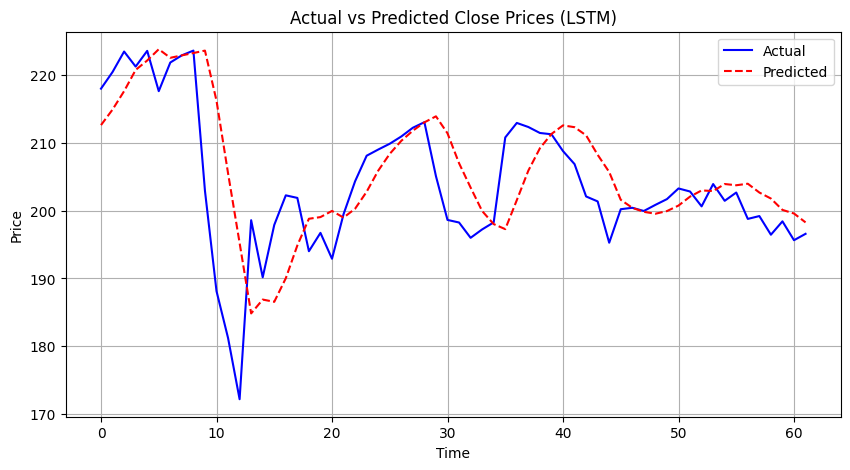

In [3]:
import matplotlib.pyplot as plt

# Inverse transform the actual y_test
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
df.to_csv('apple_stock_data.csv')